In [12]:
import pandas as pd

data = pd.read_csv('WineQT.csv')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [14]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [15]:
data.shape


(1143, 13)

In [16]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

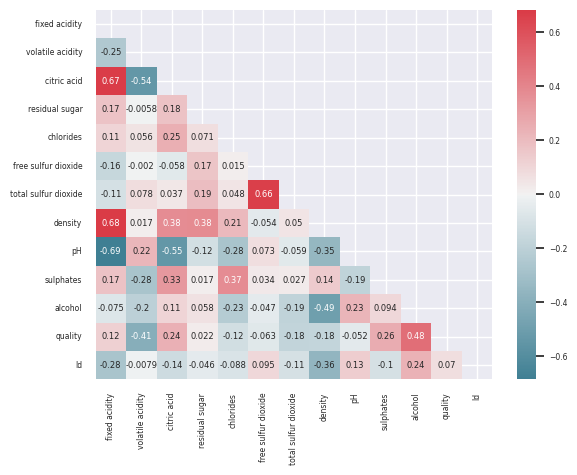

In [17]:
import seaborn as sns
import numpy as np

corr = data.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=0.5)
cmap = sns.diverging_palette(220,10, as_cmap = True)
fig = sns.heatmap(corr, mask=mask, cmap = cmap, annot=True)



In [18]:
data.drop(["residual sugar",'free sulfur dioxide','pH'],axis = 1,inplace = True)
data.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5,0
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5,1
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5,2
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6,3
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5,4


In [19]:
bins = [0,4,6,10]

labels = ['poor', 'normal', 'excellent']
data['quality_label'] = pd.cut(data['quality'], bins = bins, labels=labels)
data.drop('quality', axis=1, inplace=True)
data.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,Id,quality_label
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0,normal
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,1,normal
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,2,normal
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,3,normal
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,4,normal


In [20]:
result = data['quality_label']
data.drop(['quality_label'], axis=1, inplace=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, result, test_size=0.3, random_state=1)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)
scaled_features = scaler.transform(data)
data_sc = pd.DataFrame(scaled_features, columns = data.columns)

X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(data_sc, result, test_size=0.3,random_state=1)

X_train_sc = X_train_sc.to_numpy()
y_train_sc = y_train_sc.to_numpy()

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics  import accuracy_score

knn = KNeighborsClassifier(n_neighbors=20, weights = 'uniform')
knn.fit(X_train_sc, y_train_sc)
pred_knn = knn.predict(X_test_sc)

print('Accuracy for KNN at 20 neighbours on scaled data is:', accuracy_score(y_test_sc,pred_knn))

knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

print('Accuracy for KNN at 20 neighbours on data NOT scaled is:', accuracy_score(y_test,pred_knn))


Accuracy for KNN at 20 neighbours on scaled data is: 0.8513119533527697
Accuracy for KNN at 20 neighbours on data NOT scaled is: 0.8396501457725948


In [28]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)

dtc.fit(X_train_sc, y_train_sc)
pred_dtc = dtc.predict(X_test_sc)
print('Accuracy for DTC using gini on scaled data is:', accuracy_score(y_test_sc,pred_dtc))

dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)
print('Accuracy for DTC using gini on data NOT scaled is:', accuracy_score(y_test,pred_dtc))

Accuracy for DTC using gini on scaled data is: 0.8338192419825073
Accuracy for DTC using gini on data NOT scaled is: 0.8338192419825073
